# Smart Agriculture Advisory System

## Overview
The Smart Agriculture Advisory System is an application designed to provide farmers with personalized advice on crop management, pest control, and irrigation scheduling. By leveraging machine learning models, the system analyzes various environmental and soil parameters to recommend the most suitable crops for cultivation.

## Dataset
The dataset used for this project is sourced from Kaggle: [Crop Recommendation Dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset).

### Features
- **N (Nitrogen)**: Nitrogen content in the soil
- **P (Phosphorus)**: Phosphorus content in the soil
- **K (Potassium)**: Potassium content in the soil
- **temperature**: Temperature in degree Celsius
- **humidity**: Relative humidity in %
- **ph**: pH value of the soil
- **rainfall**: Rainfall in mm

### Target
- **label**: Type of crop to be grown

## Installation

### Prerequisites
- [Anaconda](https://www.anaconda.com/products/individual#download-section): A distribution of Python and R for scientific computing and data science.

### Steps

1. **Install Anaconda**

    Download and install Anaconda from the [official website](https://www.anaconda.com/products/individual#download-section) based on your operating system.

2. **Clone the Repository**

    ```bash
    git clone https://github.com/your-username/smart-agriculture-advisory-system.git
    cd smart-agriculture-advisory-system
    ```

3. **Create a Conda Environment**

    ```bash
    conda create --name smart-agriculture python=3.8
    conda activate smart-agriculture
    ```

4. **Install Required Libraries**

    ```bash
    pip install -r requirements.txt
    ```

5. **Install Jupyter Notebook**

    ```bash
    conda install -c conda-forge notebook
    ```

## Usage

1. **Run Jupyter Notebook**

    ```bash
    jupyter notebook
    ```

2. **Open the Notebook**

    In the Jupyter Notebook interface, open `notebooks/Smart_Agriculture_Advisory_System.ipynb` to explore the analysis, model training, and predictions.

## Project Structure

- `data/`: Contains the dataset used for training and testing.
- `notebooks/`: Jupyter notebooks for data analysis and model building.
- `models/`: Saved machine learning models.
- `scripts/`: Python scripts for data processing and model training.
- `requirements.txt`: List of required Python libraries.

## Model Details

### Model Selection
Several machine learning models were evaluated for this multi-class classification problem. The final model chosen for deployment is a Random Forest classifier due to its high accuracy and robustness.

### Model Training
The model was trained using the following steps:

1. **Data Preprocessing**: Handling missing values, scaling features, and encoding categorical variables.
2. **Feature Selection**: Identifying the most important features contributing to the prediction.
3. **Model Training**: Training the Random Forest classifier with hyperparameter tuning using GridSearchCV.

### Model Evaluation
The model's performance was evaluated using accuracy, precision, recall, and F1-score. Cross-validation was also performed to ensure the model's robustness.

## Contributing

Contributions are welche [scikit-learn](https://scikit-learn.org/) community for providing excellent machine learning tools.


In [36]:
#Import all the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models for scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [37]:
df=pd.read_csv("Crop_recommendation.csv")
df.shape

(2200, 8)

In [38]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [39]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [40]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

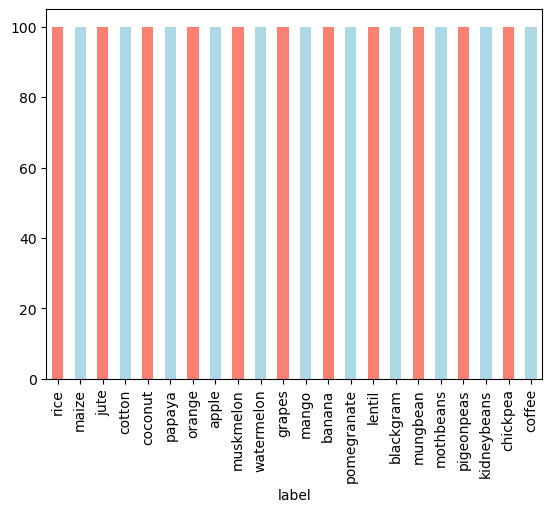

In [41]:
df["label"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [42]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [43]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [44]:
df["N"].value_counts()

N
22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: count, Length: 137, dtype: int64

In [45]:
df["ph"].value_counts()

ph
6.502985    1
6.640471    1
6.251420    1
6.274453    1
6.135996    1
           ..
7.538631    1
7.127064    1
6.628265    1
6.726469    1
6.779833    1
Name: count, Length: 2200, dtype: int64

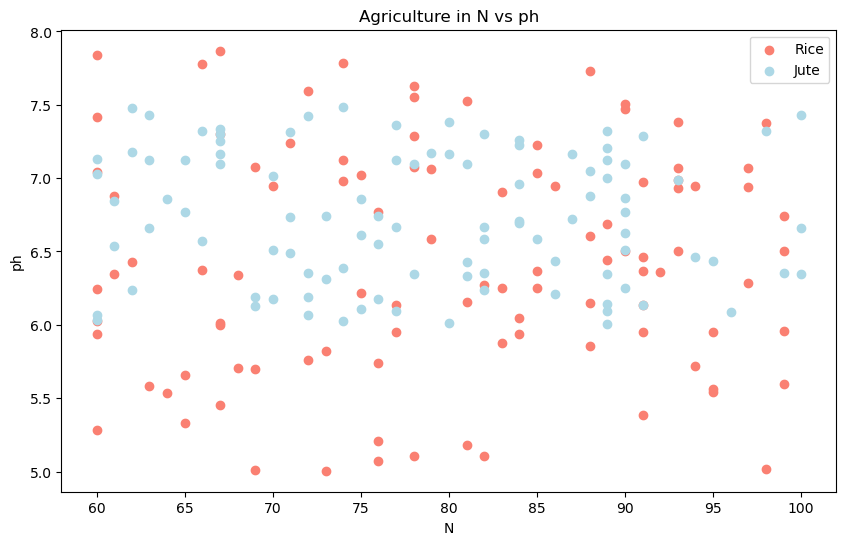

In [46]:
#create another figure
plt.figure(figsize=(10,6))

#scatter with positive example
plt.scatter(df.N[df.label=="rice"],df.ph[df.label=="rice"],c="salmon");

#scatter with negative example
plt.scatter(df.N[df.label=="jute"],df.ph[df.label=="jute"],c="lightblue");
plt.title("Agriculture in N vs ph")
plt.xlabel("N")
plt.ylabel("ph")
plt.legend(["Rice", "Jute"]);

In [47]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [48]:
X=df.drop("label",axis=1)
y=df["label"]

In [49]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [50]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [51]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [52]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


# Models Used

1) Logistic Regression
2) K-Nearest Neighbours
3) Random Forest Classifier
4) Naive Byes
5) GBM
6) SVM

In [55]:
#put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting Machine": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

#create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores    

In [56]:
model_scores=fit_and_score(models,X_train,X_test,y_train,y_test);
model_scores

C:\Users\saxen\Smart_Agriculture_System\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9454545454545454,
 'K-Nearest Neighbors': 0.9704545454545455,
 'Random Forest': 0.9931818181818182,
 'Support Vector Machine': 0.9613636363636363,
 'Gradient Boosting Machine': 0.9818181818181818,
 'Naive Bayes': 0.9954545454545455}

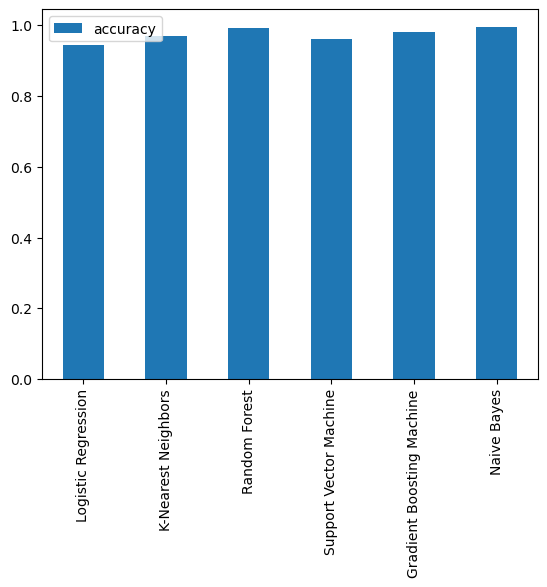

In [57]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [58]:
model_compare

,Logistic Regression,K-Nearest Neighbors,Random Forest,Support Vector Machine,Gradient Boosting Machine,Naive Bayes
accuracy,0.945455,0.970455,0.993182,0.961364,0.981818,0.995455


In [59]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [60]:
train_scores

[1.0,
 0.9892045454545455,
 0.9886363636363636,
 0.9863636363636363,
 0.9897727272727272,
 0.9852272727272727,
 0.9875,
 0.9835227272727273,
 0.9857954545454546,
 0.9823863636363637,
 0.9835227272727273,
 0.9784090909090909,
 0.9806818181818182,
 0.9789772727272728,
 0.9801136363636364,
 0.9767045454545454,
 0.9795454545454545,
 0.9738636363636364,
 0.9761363636363637,
 0.975]

In [61]:
test_scores

[0.9659090909090909,
 0.9590909090909091,
 0.9704545454545455,
 0.9681818181818181,
 0.9704545454545455,
 0.9681818181818181,
 0.9681818181818181,
 0.9613636363636363,
 0.9659090909090909,
 0.9590909090909091,
 0.9659090909090909,
 0.9636363636363636,
 0.9659090909090909,
 0.9613636363636363,
 0.9613636363636363,
 0.9590909090909091,
 0.9590909090909091,
 0.9522727272727273,
 0.9522727272727273,
 0.9545454545454546]

Maximum KNN score on the test data: 97.05%


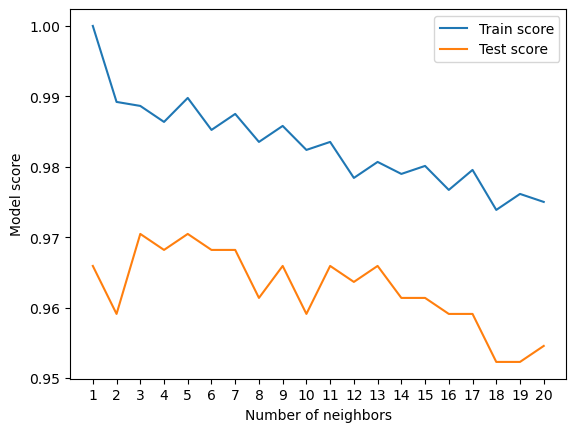

In [62]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [63]:
#create a hyperparamter grid for logisticregression
log={"C":np.logspace(-4,4,20),
"solver":["liblinear"]
}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [64]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)